# Math of star PSF 1D curve 

- author : Sylvie Dagoret-Campagne
- afflilation : LAL-CNRS
- creation date : December 16th 2019
- update :December 16th 2019



In [181]:
import os
import re
import numpy as np

In [182]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') # vary depending on your lang/locale

'en_US.UTF-8'

In [183]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [184]:
import numpy as np
import re
import time
from datetime import datetime,date
import dateutil.parser
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import Angle
from astropy import units as u
from astropy.table import Table

In [185]:
from math import ceil,floor
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
import astropy
from astropy.visualization.mpl_normalize import (ImageNormalize,MinMaxInterval,PercentileInterval,SqrtStretch,LogStretch)
from astropy.visualization.wcsaxes import SphericalCircle
from astropy.modeling.functional_models import Moffat2D

In [186]:
from numpy.core._multiarray_umath import ndarray
from skimage import feature
from skimage.transform import hough_line, hough_line_peaks
from skimage.transform import probabilistic_hough_line
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter

In [187]:
from scipy import interpolate

In [188]:
from scipy import optimize
from scipy.optimize import minimize

In [189]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(10,10)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

# Definitions

## Addition includes

In [190]:
import sys
sys.path.append("../..")
sys.path.append("../../FeaturesExtractor")
sys.path.append("../../FeaturesExtractor/features")

In [191]:
from FeaturesExtractor.config import set_logger
from FeaturesExtractor.tools import *
from FeaturesExtractor import parameters

## Function

# Configuration

In [192]:
SIGMA_X=10

In [193]:
A=1000.

In [194]:
sat_fraction=0.9  # saturation

In [195]:
FLAG_MOFFAT1D=False
ALPHA=-1         # exponent of the Moffat

In [196]:
def PSF(x):
    if FLAG_MOFFAT1D:
        M=A* np.power(1+ (x/SIGMA_X)**2 ,ALPHA)
    else:
        M=A*np.exp(- (x/SIGMA_X)**2)
        
        
    if sat_fraction==0:
        return M
    else:
        Smax=sat_fraction*A
        S=np.where(M<Smax,M,Smax)
        return S

## Plot

In [197]:
X=np.linspace(-20,20,100)

In [198]:
Y=PSF(X)

In [199]:
X.shape

(100,)

In [200]:
Y.shape

(100,)

In [201]:
Y1=np.diff(Y,n=1,prepend=[0])

In [202]:
Y1.shape

(100,)

In [203]:
Y2=np.diff(Y,n=2,prepend=[0],append=[0])

In [204]:
Y2.shape

(100,)

Text(0.5, 0.98, 'Eigen functions of Hessian $\\lambda_{rr}, \\lambda_{\\theta \\theta}$')

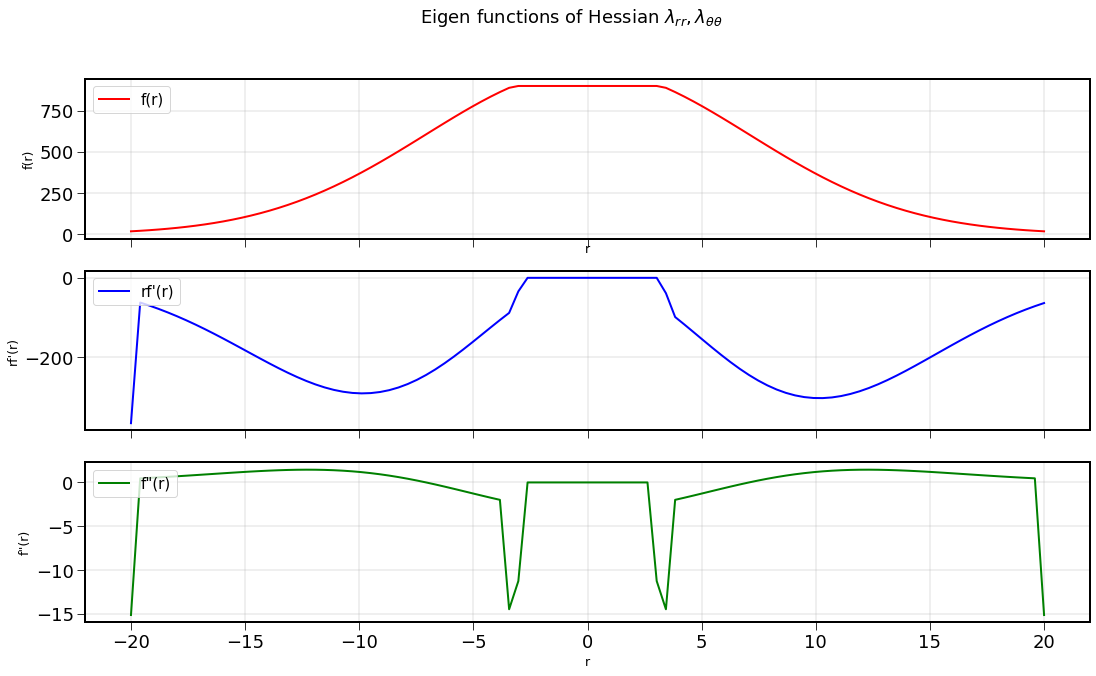

In [213]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(18, 10),sharex=True )

ax1.plot(X,Y,"r-",label="f(r)")
ax1.grid()
ax1.legend(loc="upper left")
ax1.set_xlabel("r")
ax1.set_ylabel("f(r)")
ax2.plot(X,X*Y1,"b-",label="rf\'(r)")
ax2.set_ylabel("rf\'(r)")
ax2.grid()
ax2.legend(loc="upper left")
ax3.plot(X,Y2,"g-",label="f\"(r)")
ax3.grid()
ax3.set_ylabel("f\"(r)")
ax3.set_xlabel("r")
ax3.legend(loc="upper left")
plt.suptitle("Eigen functions of Hessian $\lambda_{rr}, \lambda_{\\theta \\theta}$")

Text(0.5, 0.98, 'Eigen functions of Hessian $\\lambda_{rr}, (1/r^2)\\lambda_{\\theta \\theta}$')

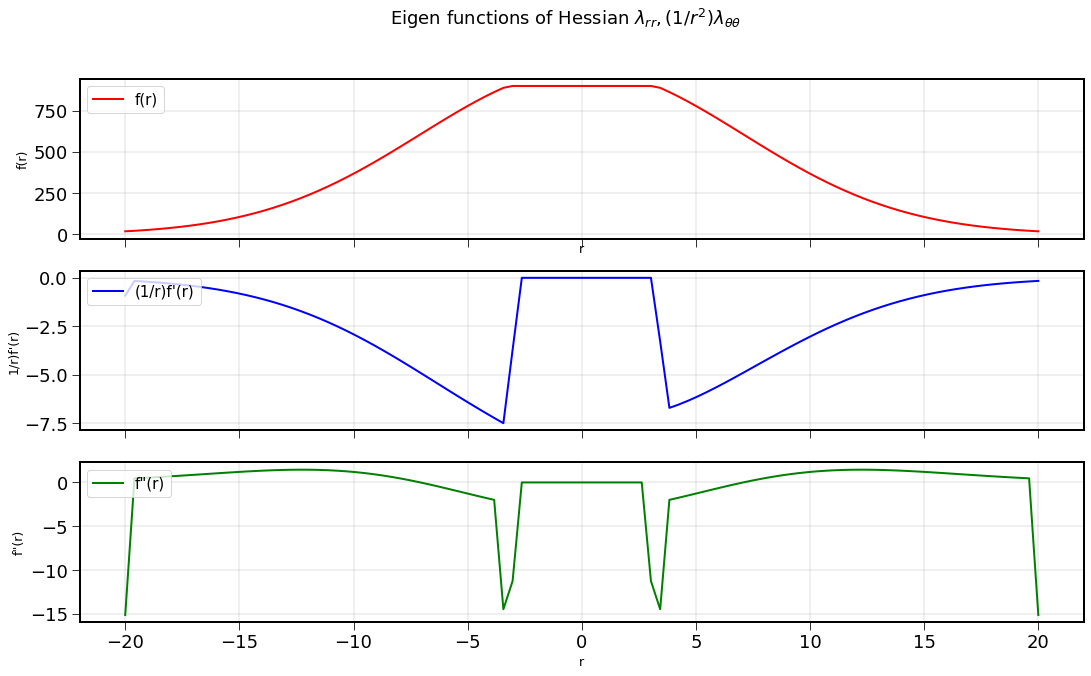

In [215]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(18, 10),sharex=True )

ax1.plot(X,Y,"r-",label="f(r)")
ax1.grid()
ax1.legend(loc="upper left")
ax1.set_xlabel("r")
ax1.set_ylabel("f(r)")
ax2.plot(X,Y1/X,"b-",label="(1/r)f\'(r)")
ax2.set_ylabel("1/r)f\'(r)")
ax2.grid()
ax2.legend(loc="upper left")
ax3.plot(X,Y2,"g-",label="f\"(r)")
ax3.grid()
ax3.set_ylabel("f\"(r)")
ax3.set_xlabel("r")
ax3.legend(loc="upper left")

plt.suptitle("Eigen functions of Hessian $\lambda_{rr}, (1/r^2)\lambda_{\\theta \\theta}$")